# Homework 2: DataFrames, Data Visualization, and Functions

## Due Sunday, October 20th at 11:59PM

Welcome to Homework 2! This week, we will cover DataFrame manipulations, making visualizations, and defining functions. You can find additional help on these topics in  [BPD 6, 9-12](https://notes.dsc10.com/01-getting_started/functions-defining.html) in the `babypandas` notes and [CIT 7-7.3](https://inferentialthinking.com/chapters/07/Visualization.html) in the textbook.

### Instructions

Remember to start early and submit often. You are given six slip days throughout the quarter to extend deadlines. See the syllabus for more details. With the exception of using slip days, late work will not be accepted unless you have made special arrangements with your instructor.

**Important**: For homeworks, the `otter` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). These are great questions for office hours (see the schedule on the [Calendar](https://dsc10.com/calendar)) or Ed. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

**Please do not use for-loops for any questions in this homework.** If you don't know what a for-loop is, don't worry – we haven't covered them yet. But if you do know what they are and are wondering why it's not OK to use them, it is because loops in Python are slow, and looping over arrays and DataFrames should usually be avoided.

<font color=red>**🚨 If you create a data visualization that is too cluttered to read or takes more than a few seconds to generate, this is a sign you are doing something wrong. Do not submit code like this, or the Gradescope autograder may fail to grade your entire assignment. It's better to leave a question blank than to submit code that will cause the autograder to fail on your full assignment.**</font>

In [1]:
# Please don't change this cell, but do make sure to run it
import babypandas as bpd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)

import otter
grader = otter.Notebook()

## 1. UCSD ArtPower Events 🎨🎺💃

<center><img src="./images/artpower.jpg" width=600/></center>

As a UCSD student, you may have noticed some emails from <a href="https://artpower.ucsd.edu/">ArtPower</a>, a campus-based performing arts initiative, advertising upcoming events. ArtPower's self-described mission is to "present performing arts that engage, energize, and transform the diverse cultural life of the university and San Diego." ArtPower events are open to the general public, and many are free for UCSD students. They encompass all sorts of performing arts, such as music, dance, and theatre. 

In this question, we'll work with a dataset of upcoming ArtPower events in the 2024-25 season. This dataset was collected by one of your fellow DSC 10 classmates, Austin Flippo, who wrote a <a href="https://github.com/AustinFlippo/UCSD_Events_Scraper">web scraper</a> to collect information from the <a href="https://artpower.ucsd.edu/events/"> ArtPower Events website</a> and store this information in a DataFrame. This DataFrame, `artpower`, is provided below, and it contains the following information for each event. 

|Column|Description|
|------|-----------|
|`'Event Name'`|The name of the event|
|`'Category'`|The type of event|
|`'Description'`|A brief summary of the event|
|`'Link'`|The link to the event webpage|
|`'Price'`|A breakdown of the pricing for different groups of people|
|`'Date'`|Day, month, and year of the event|
|`'Time'`|The day of the week and the time of the event|
|`'Location'`|Location of the event (often on campus, but not always)|
|`'Latitude'`|The latitude for the event's location|
|`'Longitude'`|The longitude for the event's location|

In [2]:
artpower = bpd.read_csv('data/artpower.csv')
artpower

,Event Name,Category,Description,Link,Price,Date,Time,Location,Latitude,Longitude
0,Roomful of Teeth,Chamber Music*,“Roomful of Teeth is revolutionizing choral mu...,https://artpower.ucsd.edu/event/roomful-of-teeth/,"['Reserved Seating: $40–65', 'UCSD Student: ...",13 OCT 2024,SUN 2:00 PM,Department of Music's Conrad Prebys Concert Hall,32.878244,-117.234525
1,An Evening with Ocean Vuong,Speaker,Moderated by UC San Diego Literature Professor...,https://artpower.ucsd.edu/event/ocean-vuong/,"['General Admission: $25', 'UCSD Student: Li...",16 OCT 2024,WED 5:00 PM,Epstein Family Amphitheater,32.879193,-117.232998
2,Lucy Kalantari and the Jazz Cats: Haunting Day...,Family,Welcome to the Haunting Days of Halloween. Wha...,https://artpower.ucsd.edu/event/lucy-kalantari...,"['General Admission: $20', 'UCSD Student: Li...",19 OCT 2024,SAT 11:00 am,Epstein Family Amphitheater,32.879193,-117.232998
3,Sara Schoenbeck and Wayne Horvitz,Chamber Music*,The Sara Schoenbeck and Wayne Horvitz duo navi...,https://artpower.ucsd.edu/event/wayne-horvitz/,"['General Admission: $20', 'UCSD Student: Li...",28 OCT 2024,MON 8 pm,"The Loft, La Jolla",32.879464,-117.235911
4,Kassa Overall,Jazz,"Kassa Overall is a Grammy-nominated musician, ...",https://artpower.ucsd.edu/event/kassa-overall/,"['General Admission: $20', 'UCSD Student: Fr...",30 OCT 2024,WED 8:30 pm,"The Loft, La Jolla",32.879464,-117.235911
...,...,...,...,...,...,...,...,...,...,...
32,Meta4,Chamber Music,"Founded in 2001, Meta4 is one of Finland’s mos...",https://artpower.ucsd.edu/event/meta4/,"['Reserved Seating: Tickets start at $40', 'U...",25 APR 2025,FRI 7:30 pm,Department of Music's Conrad Prebys Concert Hall,32.878244,-117.234525
33,THE JUMP UP!,Special Event,"Sandbox Percussion, Steven Schick, and local c...",https://artpower.ucsd.edu/event/the-jump-up/,['Free: RSVP recommended'],26 APR 2025,SAT 3 pm,Epstein Family Amphitheater,32.879193,-117.232998
34,Malpaso Dance Company,Dance,"Since its appearance at ArtPower in 2017, the ...",https://artpower.ucsd.edu/event/malpaso-dance-...,"['Reserved Seating: Tickets start at $30', 'U...",29 APR 2025,TUE 7:30 pm,Epstein Family Amphitheater,32.879193,-117.232998
35,An Evening with David Sedaris,Speaker,Master of satire and one of today’s most obser...,https://artpower.ucsd.edu/event/david-sedaris-...,"['Reserved Seating: $52.50–78.90', 'UCSD Stud...",08 MAY 2025,THU 7:30 pm,Balboa Theatre,32.714322,-117.161342


Let's start by exploring the `'Event Name'` column using the `describe()` method.

In [3]:
artpower.get('Event Name').describe()

count                                                    37
unique                                                   36
top       CONTRA-TIEMPO Activist Dance Theatre | joyUS j...
freq                                                      2
Name: Event Name, dtype: object

**Question 1.1.** From the output above, we see that there are 37 event names, but only 36 of them are unique. This means that there are two events with the same name in `artpower`. Find the name of the event that is duplicated and store the result in `same_name` below.

***Hint:*** Can you organize events so that events with the same name wind up together?

In [4]:
event_counts = artpower.groupby('Event Name').size()

same_name = event_counts[event_counts > 1].index[0]
same_name


'CONTRA-TIEMPO Activist Dance Theatre | joyUS justUS'

In [5]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.** Are these actually two different events? Or is there an error in the data whereby we actually have two rows corresponding to the same event at the same time and place? To answer this question, make a new DataFrame, `same_name_events`, which should have the same columns as `artpower`, but only the two rows whose `'Event Name'` is `same_name`, as you found in the previous question. Look to see if there are any differences between the two rows!

In [6]:
same_name_events = artpower[artpower.get('Event Name') == same_name]
same_name_events

,Event Name,Category,Description,Link,Price,Date,Time,Location,Latitude,Longitude
10,CONTRA-TIEMPO Activist Dance Theatre | joyUS j...,Dance,joyUS justUS is an evening length participator...,https://artpower.ucsd.edu/event/contra-tiempo-...,"['General Admission: $40', 'UCSD Student: Li...",22 NOV 2024,FRI 7:30 pm,Mandeville Auditorium,32.877742,-117.239442
11,CONTRA-TIEMPO Activist Dance Theatre | joyUS j...,Dance,joyUS justUS is an evening length participator...,https://artpower.ucsd.edu/event/contra-tiempo-...,"['General Admission: $40', 'UCSD Student: Li...",23 NOV 2024,SAT 7:30 pm,Mandeville Auditorium,32.877742,-117.239442


In [7]:
grader.check("q1_2")

q1_2 results: All test cases passed!

Next, let's look at the different event `'Category'` values that appear in the `artpower` DataFrame. You may notice that some events have a `'Category'` of `'Chamber Music'`, while others have a `'Category'` of `'Chamber Music*'`. 

In [8]:
artpower.get('Category')

0      Chamber Music*
1             Speaker
2              Family
3      Chamber Music*
4                Jazz
           ...       
32      Chamber Music
33      Special Event
34              Dance
35            Speaker
36    American Routes
Name: Category, Length: 37, dtype: object

Why the asterisk, you ask? Great question! Here is ArtPower's explanation:

>**ASTERISK\***
>When you see this symbol\*, it indicates artists that are pushing the boundaries, often across genres.

**Question 1.3.** Then create a DataFrame called `chamber_music` that contains all the rows of `artpower` for events where the `'Category'` is `'Chamber Music'`, and all the rows for events where the `'Category'` is `'Chamber Music*'`, but no additional rows. 

In [9]:
chamber_music = artpower[(artpower.get('Category') == 'Chamber Music') | (artpower.get('Category') == 'Chamber Music*')]
chamber_music

,Event Name,Category,Description,Link,Price,Date,Time,Location,Latitude,Longitude
0,Roomful of Teeth,Chamber Music*,“Roomful of Teeth is revolutionizing choral mu...,https://artpower.ucsd.edu/event/roomful-of-teeth/,"['Reserved Seating: $40–65', 'UCSD Student: ...",13 OCT 2024,SUN 2:00 PM,Department of Music's Conrad Prebys Concert Hall,32.878244,-117.234525
3,Sara Schoenbeck and Wayne Horvitz,Chamber Music*,The Sara Schoenbeck and Wayne Horvitz duo navi...,https://artpower.ucsd.edu/event/wayne-horvitz/,"['General Admission: $20', 'UCSD Student: Li...",28 OCT 2024,MON 8 pm,"The Loft, La Jolla",32.879464,-117.235911
15,JACK Quartet + Art of Elan,Chamber Music*,Following a highly successful performance at t...,https://artpower.ucsd.edu/event/jack-quartet-a...,"['Reserved Seating: $40–$48', 'UCSD Student: ...",10 DEC 2024,TUE 7:30 pm,Department of Music's Conrad Prebys Concert Hall,32.878244,-117.234525
22,Harlem Quartet | Echoes of Inspiration,Chamber Music,“One of the greatest string quartets I have ev...,https://artpower.ucsd.edu/event/harlem-quartet...,"['Reserved Seating: Tickets start at $40', 'U...",14 FEB 2025,FRI 7:30 pm,Department of Music's Conrad Prebys Concert Hall,32.878244,-117.234525
23,Caroline Shaw & Sō Percussion featuring Ringdown,Chamber Music*,"For 20 years and counting, Sō Percussion has r...",https://artpower.ucsd.edu/event/caroline-shaw-...,"['General Admission: $40', 'UCSD Student: Li...",18 FEB 2025,TUE 7:30 pm,Mandeville Auditorium,32.877742,-117.239442
25,Brentano String Quartet,Chamber Music,"With a career spanning over three decades, the...",https://artpower.ucsd.edu/event/brentano-strin...,"['Reserved Seating: Tickets start at $40', 'U...",28 FEB 2025,FRI 7:30 pm,Department of Music's Conrad Prebys Concert Hall,32.878244,-117.234525
32,Meta4,Chamber Music,"Founded in 2001, Meta4 is one of Finland’s mos...",https://artpower.ucsd.edu/event/meta4/,"['Reserved Seating: Tickets start at $40', 'U...",25 APR 2025,FRI 7:30 pm,Department of Music's Conrad Prebys Concert Hall,32.878244,-117.234525


In [10]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 1.4.** Suppose you want to extract the day of the week (e.g. Monday) for each event. Write a function called `day_of_week` that takes as input one entry from the ``'Time'`` column and outputs the three-letter abbreviation of the day of the week associated with that entry. For example, the call `day_of_week('FRI 7:30 pm')` should return the string `'FRI'`. You can assume that the inputs to your function will always be in the format shown in the `'Time'` column of `artpower`.

In [49]:
def day_of_week(time):
    return time[:3]

print(day_of_week('FRI 7:30'))

FRI


In [12]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**Question 1.5.** Using the `day_of_week` function you just wrote, assign the variable `most_dow` to the day of the week that has the *largest* number of events planned. Then, assign `least_dow` to the day of the week that has the *smallest* number of events planned. Finally, assign `difference_dow` to the difference between the number of events on the most popular (`most_dow`) and least popular (`least_dow`) days of the week. 

***Hints:*** 
- You will need to define additional variables to answer this question. Feel free to add more cells above the provided cell.
- Start by adding a column to `artpower` that contains the day of the week for each event.

In [51]:
artpower = artpower.assign(day_of_week = artpower.get('Time').apply(day_of_week))

day_counts = artpower.groupby('day_of_week').size()

most_dow = day_counts[day_counts == day_counts.max()].index[0]
least_dow = day_counts[day_counts == day_counts.min()].index[0]

difference_dow = day_counts.max() - day_counts.min()

print("Events occur the most on", most_dow)
print("Events occur the least on", least_dow)
print(most_dow, "has", difference_dow, "more events planned than", least_dow)

Events occur the most on FRI
Events occur the least on MON
FRI has 10 more events planned than MON


In [14]:
grader.check("q1_5")

q1_5 results: All test cases passed!

**Question 1.6.** Construct an appropriate visualization to compare the distribution of the number of events across different days of the week, sorted so that the day with the most events appears first in your visualization. Make sure to include every day of the week and its corresponding number of events.

***Note:*** With this problem, and with all others, make sure your solutions sticks to the methods of the course. While there are many ways to make plots in Python, we've only used one, `.plot`.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q1_6
manual: true
-->

<AxesSubplot:title={'center':'Number of Events by Day of the Week'}, xlabel='Day of the Week', ylabel='Number of Events'>

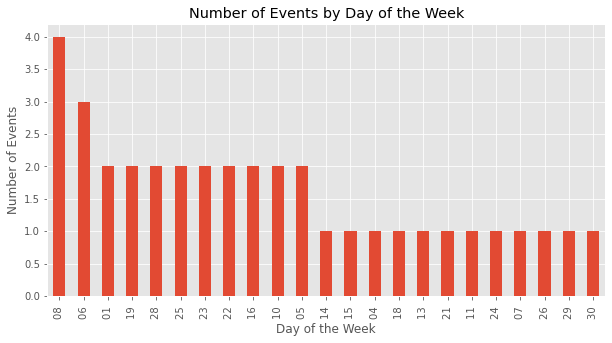

In [15]:
day_counts = artpower.groupby('day_of_week').size()

day_counts_sorted = day_counts.sort_values(ascending=False)

day_counts_sorted.plot(kind='bar', title="Number of Events by Day of the Week", xlabel="Day of the Week", ylabel="Number of Events")


<!-- END QUESTION -->



**Question 1.7.** In each row of `artpower`, we are given the `'Latitude'` and `'Longitude'`, which tells us a precise geographical location for each ArtPower event. To see how events are located relative to one another, create a scatter plot with `'Longitude'` on the x-axis and `'Latitude'` on the y-axis for every event in the `artpower` DataFrame. 

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q1_7
manual: true
-->

<AxesSubplot:title={'center':'ArtPower Event Locations'}, xlabel='Longitude', ylabel='Latitude'>

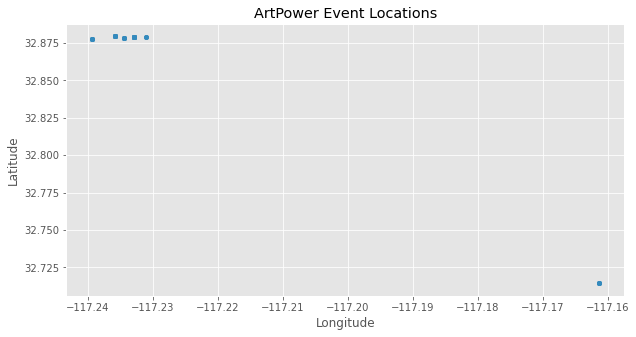

In [16]:
artpower.plot(kind='scatter', x='Longitude', y='Latitude', title="ArtPower Event Locations", xlabel="Longitude", ylabel="Latitude")

<!-- END QUESTION -->



Your scatter plot shows how the event locations are related to one another geographically, but it's hard to draw much insight from such a basic plot. For example, you might not realize from looking at the plot above that all the dots in the upper left corner correspond to events happening on UCSD's campus, while the dots in the bottom right correspond to events happening in downtown San Diego. That would be much easier to discover if we could plot these points not just on a scatter plot, but on a map.

Luckily, there's a Python package for that. Run the cell below to import the package `folium`, which supports maps, and to see the ArtPower events on a map we've created using the `'Latitude'` and `'Longitude'` values in `artpower`. You don't need to understand the code that creates the map, but do try zooming in and clicking around on the map that is produced. 

In [17]:
import folium
from folium.plugins import MarkerCluster

def create_map():
    my_map = folium.Map(location=[32.8, -117.2], zoom_start=11)
    marker_cluster = MarkerCluster().add_to(my_map)
    for i in np.arange(artpower.shape[0]):
        folium.Marker(
            location=[artpower.get('Latitude').iloc[i], artpower.get('Longitude').iloc[i]],
            tooltip="Click me!",
            popup=artpower.get('Event Name').iloc[i] + ' on ' + artpower.get('Date').iloc[i],
            icon=folium.Icon(icon="star")
        ).add_to(marker_cluster)
    return my_map

create_map()

**Question 1.8.** From exploring the map above, you should see that there are only a few different `'Location'`s where ArtPower events take place. Since the map automatically clusters events at nearby `'Location'`s, you can easily see how many events take place on campus versus off campus. 

In the cell below, write code to extract the number of upcoming ArtPower events that will take place on and off campus, storing your results in `on_campus` and `off_campus`, respectively. Don't just type in the numbers you see in the map above; write code to extract the values from the `artpower` DataFrame. When you're done, make sure that your results agree with what you see in the map. 

You will need to use the fact that the only off-campus `'Location'` for upcoming ArtPower events is `'Balboa Theatre'` in downtown San Diego.

In [18]:
on_campus = artpower[artpower.get('Location') != 'Balboa Theatre'].shape[0]
off_campus = artpower[artpower.get('Location') == 'Balboa Theatre'].shape[0]
print("There are", on_campus, "events on campus and", off_campus, "events off campus.")

There are 33 events on campus and 4 events off campus.


In [19]:
grader.check("q1_8")

q1_8 results: All test cases passed!

## 2. Are You Scared Yet? Analyzing Horror Movies 🎃😱

<center><img src='./images/hocus_pocus.jpg' width = 400/></center>

Spooky season is upon us! We've provided a file, `data/horror_movies.csv`, that contains information about horror movies. For each movie, we have 10 pieces of information (see the data description below) that we'll use to generate some insights about the state of horror movies in recent years. 

| Column      | Description |
| ----------- | ----------- |
| `'Title'`      | Title of the movie, with the year in parentheses    |
| `'Country'`   | Country the movie was originally released in        |
| `'Maturity Rating'` | A rating given to the movie by the Motion Picture Association |
| `'Review Rating'` | The IMDb rating of the film, representing how good it was | 
| `'Language'` | The language the movie is in | 
| `'Filming Locations'` | The location in which the movie was filmed |
| `'Budget'` | The total amount spent on the movie |
| `'Release Month'` | The month the movie was released |
| `'Release Day'` | The day of the month the movie was released |
| `'Run Time'` | The length of the film in minutes |

In [20]:
# Run this cell to load the dataset.
horror = bpd.read_csv('data/horror_movies.csv') 
horror

,Title,Country,Maturity Rating,Review Rating,Language,Filming Locations,Budget,Release Month,Release Day,Run Time
0,Rise of the Animals (2011),USA,NOT RATED,3.6,English,"Rochester, New York, USA",7000,May,1,70
1,Zombie Resurrection (2014),UK,NOT RATED,2.7,English,"Hampshire, England, UK",100000,March,23,86
2,Before Dawn (2013),Japan,NOT RATED,4.7,English,"Yorkshire, England, UK",25000,June,8,82
3,Apparition (2015),USA,NOT RATED,4.0,English,"Philadelphia, Pennsylvania, USA",3000000,May,5,100
4,Her Cry: La Llorona Investigation (2013),USA,NOT RATED,5.4,English,"Houston, Texas, USA",60000,April,19,89
...,...,...,...,...,...,...,...,...,...,...
457,Insidious: Chapter 3 (2015),USA,PG-13,6.1,English,"929 South Broadway, Downtown, Los Angeles, Cal...",10000000,June,5,97
458,The Purge (2013),USA,R,5.7,English,"Chatsworth, Los Angeles, California, USA",3000000,June,7,85
459,13 Sins (2014),Poland,R,6.3,English,"New Orleans, Louisiana, USA",4000000,April,11,93
460,Victor Frankenstein (2015),USA,PG-13,6.0,English,"London, England, UK",40000000,November,25,110


**Question 2.1.** Examine the columns available in `horror` and consider which would be the best choice of index for this DataFrame. Change the `horror` DataFrame so that it's indexed by the values in this column instead of the default index.

In [21]:
horror = horror.set_index('Title')
horror

,Country,Maturity Rating,Review Rating,Language,Filming Locations,Budget,Release Month,Release Day,Run Time
Title,,,,,,,,,
Rise of the Animals (2011),USA,NOT RATED,3.6,English,"Rochester, New York, USA",7000,May,1,70
Zombie Resurrection (2014),UK,NOT RATED,2.7,English,"Hampshire, England, UK",100000,March,23,86
Before Dawn (2013),Japan,NOT RATED,4.7,English,"Yorkshire, England, UK",25000,June,8,82
Apparition (2015),USA,NOT RATED,4.0,English,"Philadelphia, Pennsylvania, USA",3000000,May,5,100
Her Cry: La Llorona Investigation (2013),USA,NOT RATED,5.4,English,"Houston, Texas, USA",60000,April,19,89
...,...,...,...,...,...,...,...,...,...
Insidious: Chapter 3 (2015),USA,PG-13,6.1,English,"929 South Broadway, Downtown, Los Angeles, Cal...",10000000,June,5,97
The Purge (2013),USA,R,5.7,English,"Chatsworth, Los Angeles, California, USA",3000000,June,7,85
13 Sins (2014),Poland,R,6.3,English,"New Orleans, Louisiana, USA",4000000,April,11,93


In [22]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**_Note:_**  If you were to run the cell where you set the index of `horror` again, you'd see an error message. Stop and think about _why_ you'd run into an error. Once you've thought about it, click the thinking emoji below to see the reason for the error.

<br>

<details>
    <summary>Why would there be an error? 🤔</summary><br>
    There would be an error since you'd be trying to set the index of <code>horror</code> to a column that no longer exists in <code>horror</code> – the column wouldn't exist because it was converted to the index the first time you ran the cell (and the index is not a column)!
</details>

If you acually ran the cell twice and got an error message, don't worry. To get rid of it, just re-run the cell where you defined the `horror` DataFrame, then run the cell in 2.1 just once, and you'll be good to go.

When you submit your work for autograding, the entire notebook will be run from start to finish. Each cell will run only once, so it's no problem if your code errors on the second run. In this case, it means you're doing something right!

**Question 2.2.** *The Ouija Experiment*, released in 2013, is among the lowest-budget movies in our dataset. What is the `'Budget'` of `'The Ouija Experiment (2013)'`, and what is its `'Review Rating'`? Assign your answers to variables `OE_budget` and `OE_rating`, respectively.

In [23]:
OE_budget = horror.get('Budget').loc['The Ouija Experiment (2013)']
OE_rating = horror.get('Review Rating').loc['The Ouija Experiment (2013)']
print('The budget for The Ouija Experiment was', OE_budget, 'and the rating was', OE_rating)

The budget for The Ouija Experiment was 1200 and the rating was 3.3


In [24]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 2.3.** Horror movies can be really entertaining, but they can also be really bad. Assign `lowest_rated_movie` to the name of the movie with the lowest `'Review Rating'` (including the year in parentheses), and set the `'Review Rating'` of that movie to `lowest_rating`.

In [25]:
lowest_rating = horror.get('Review Rating').min()
lowest_rated_movie = horror[horror.get('Review Rating') == lowest_rating].index[0]
print('The lowest-rated movie is', lowest_rated_movie, 'with a rating of', lowest_rating)

The lowest-rated movie is Krampus: The Devil Returns (2016) with a rating of 1.6


In [26]:
grader.check("q2_3")

q2_3 results: All test cases passed!

**Question 2.4.** That's a very low rating, but how does that compare to the other movies included in the dataset? First, plot a density histogram that shows the distribution of `'Review Rating'`. Then compute the absolute difference between the lowest rating and the **median** rating, and assign the result to the variable `below_med`.

When plotting your histogram, remember to set `density=True` and `ec='w'`. You don't have to set the `bins` argument.

3.4

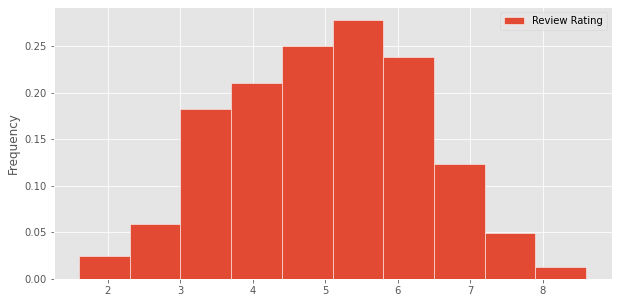

In [27]:
# Create your histogram here.
horror.plot(kind='hist', y='Review Rating', density=True, ec='w')

# Then calculate below_med.
median_rating = horror.get('Review Rating').median()
below_med = abs(lowest_rating - median_rating)
below_med

In [28]:
grader.check("q2_4")

q2_4 results: All test cases passed!

**Question 2.5.** How many movies in our dataset were released in October and have been given a `'Maturity Rating'`? Set the number of such movies equal to the variable `oct_rated_count`. Note that movies *without* a `'Maturity Rating'` appear as either `'NOT RATED'` or `'UNRATED'`.  

In [29]:
october_horror_movies = horror[horror.get('Release Month') == 'October']

rated_october_horror_movies = october_horror_movies[(october_horror_movies.get('Maturity Rating') != 'NOT RATED') & (october_horror_movies.get('Maturity Rating') != 'UNRATED')]

oct_rated_count = rated_october_horror_movies.shape[0]
oct_rated_count

36

In [30]:
grader.check("q2_5")

q2_5 results: All test cases passed!

### Aside: String methods and Series

**Before proceeding to Question 2.6., make sure to read this aside.**

As we saw in [Lecture 2](https://dsc10.com/resources/lectures/lec02/lec02.html#String-methods), strings have several methods available to them.

In [31]:
'Apparition (2015)'.lower()

'apparition (2015)'

In [32]:
'Apparition (2015)'.replace('i', '👀')

'Appar👀t👀on (2015)'

`babypandas` makes it easy for us to use string methods on Series of strings. To do this, we follow the pattern

```py
ser.str.method(args)
```

where `ser` is a Series, `method` is the name of a method, and `args` are the arguments to that method (if any). The key difference between string-specific Series methods and other Series methods (like `ser.mean()`) is that we need to write `.str` first.

For example, the following expression returns a Series containing the values in the `'Country'` column but converted to lowercase.

In [33]:
horror.get('Country').str.lower()

Title
Rise of the Animals (2011)                     usa
Zombie Resurrection (2014)                      uk
Before Dawn (2013)                           japan
Apparition (2015)                              usa
Her Cry: La Llorona Investigation (2013)       usa
                                             ...  
Insidious: Chapter 3 (2015)                    usa
The Purge (2013)                               usa
13 Sins (2014)                              poland
Victor Frankenstein (2015)                     usa
BloodRayne: The Third Reich (2011)           japan
Name: Country, Length: 462, dtype: object

It is essentially using the string method `.lower()` on **every** string in the Series `horror.get('Country')`, all at the same time!

The following expression replaces all `'i'`s with `'👀'` in the index. (Yes, you can use `.str` with the index as well!)

In [34]:
horror.index.str.replace('i', '👀')

Index(['R👀se of the An👀mals (2011)', 'Zomb👀e Resurrect👀on (2014)',
       'Before Dawn (2013)', 'Appar👀t👀on (2015)',
       'Her Cry: La Llorona Invest👀gat👀on (2013)',
       'Haunted House on Soror👀ty Row (2014)', 'Legend Has It (2009)',
       'Fet👀sh Dolls D👀e Laugh👀ng (2012)', 'Holla II (2013)',
       'The Lurk👀ng (2015)',
       ...
       'The Bad Batch (2016)', 'Dracula Untold (2014)', 'Nurse 3D (2013)',
       'Ant👀b👀rth (2016)', 'Clown (2014)', 'Ins👀d👀ous: Chapter 3 (2015)',
       'The Purge (2013)', '13 S👀ns (2014)', 'V👀ctor Frankenste👀n (2015)',
       'BloodRayne: The Th👀rd Re👀ch (2011)'],
      dtype='object', name='Title', length=462)

Look at the `'Filming Locations'` column of `horror`, which is a Series.

In [35]:
horror.get('Filming Locations')

Title
Rise of the Animals (2011)                                           Rochester, New York, USA
Zombie Resurrection (2014)                                             Hampshire, England, UK
Before Dawn (2013)                                                     Yorkshire, England, UK
Apparition (2015)                                             Philadelphia, Pennsylvania, USA
Her Cry: La Llorona Investigation (2013)                                  Houston, Texas, USA
                                                                  ...                        
Insidious: Chapter 3 (2015)                 929 South Broadway, Downtown, Los Angeles, Cal...
The Purge (2013)                                     Chatsworth, Los Angeles, California, USA
13 Sins (2014)                                                    New Orleans, Louisiana, USA
Victor Frankenstein (2015)                                                London, England, UK
BloodRayne: The Third Reich (2011)                    

The following expression returns a Boolean Series, with `True` for movies whose `'Filming Locations'` **contain** (or include) the string `'England'` and `False` for all other movies. (Note that `.contains()` is not a regular string method in Python, while the other examples – `.lower()` and `.replace()` – are.)

In [36]:
horror.get('Filming Locations').str.contains('England')

Title
Rise of the Animals (2011)                  False
Zombie Resurrection (2014)                   True
Before Dawn (2013)                           True
Apparition (2015)                           False
Her Cry: La Llorona Investigation (2013)    False
                                            ...  
Insidious: Chapter 3 (2015)                 False
The Purge (2013)                            False
13 Sins (2014)                              False
Victor Frankenstein (2015)                   True
BloodRayne: The Third Reich (2011)          False
Name: Filming Locations, Length: 462, dtype: bool

Remember that we use Boolean Series to make queries!

Now you're ready to proceed to Question 2.6. If you'd like another explanation of Series string methods, and `.str.contains` in particular, watch [this video](https://www.youtube.com/watch?v=TCcEhVA6Euw&list=PLDNbnocpJUhbczUw2Rw6bqreEECMvZ8gN&index=2).

**Question 2.6.** Which movie titles contain the word `'night'`, with any capitalization? Create an *array* called `night_movies` containing the titles of all such movies, capitalized exactly as they appear in the DataFrame. 

**_Hints:_** 
- To convert a sequence into an array, call the function `np.array` on the sequence.
- The movie names are all strings, so they may have inconsistencies in how they're capitalized. We want to count movie titles with the words `'Night'`, `'night'`, and even `'NiGHt'`. If we want to account for variations in capitalization, what operation should we call on the movie names **first**? (You may end up using `.str` twice!)

In [37]:
movies_with_night = horror[horror.index.str.lower().str.contains('night')]

night_movies = np.array(movies_with_night.index)
night_movies

array(['Silent Night, Bloody Night: The Homecoming (2013)',
       'Dream Nightmare (2016)', "Hyde's Secret Nightmare (2011)",
       'Night Terrors (2014)', "All Sinner's Night (2014)",
       'Darkest Night (2012)', 'Evil Night (2014)',
       'Darker Than Night (2014)',
       'Poultrygeist: Night of the Chicken Dead (2006)',
       'It Comes at Night (2017)'], dtype=object)

In [38]:
grader.check("q2_6")

q2_6 results: All test cases passed!

**Question 2.7.** Create a DataFrame named `country_proportions`, indexed by `'Country'`, with one column named `'Proportion'`. The `'Proportion'` column should contain, for each country, the proportion of movies in the dataset from that country. Order the rows in descending order of `'Proportion'`.

**_Hints:_** 
- Proportions can be easily calculated from counts.
- If you pass in a **list** of columns names to `.get()`, the result will be a DataFrame containing only the columns specified in the list. 

In [39]:
country_proportions = horror.reset_index().groupby('Country').count()

country_proportions = (country_proportions.assign(Proportion = country_proportions.get('Title') /
                       country_proportions.shape[0])
                       .get(['Proportion'])
                       .sort_values(by='Proportion', ascending=False)
                      )
country_proportions

,Proportion
Country,
USA,9.184211
UK,0.710526
Japan,0.184211
Kuwait,0.157895
Philippines,0.157895
...,...
Denmark,0.026316
Belarus,0.026316
Bahrain,0.026316


In [40]:
grader.check("q2_7")

q2_7 results: All test cases passed!

**Question 2.8**  Create a horizontal bar chart that displays the **mean** `'Review Rating'` for each country's horror movies. Sort the bars so that the country with the lowest mean appears at the very top and the country with the highest mean appears at the bottom.

**_Hints:_** 
- To get the bar chart to display nicely, try adding the keyword argument `figsize=(10, 10)`.
- If your bar chart still doesn't look very nice after setting `figsize=(10, 10)`, make sure you are first calculating the **average** `'Review Rating'` of each country. You should not be plotting directly from the `horror` DataFrame.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q2_8
manual: True
-->

<AxesSubplot:ylabel='Country'>

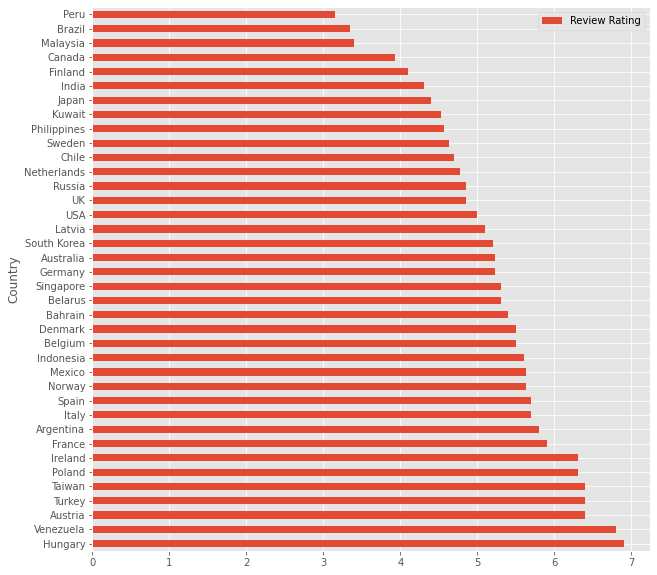

In [50]:
average_review_rating = (horror.groupby('Country')
                        .mean()
                        .get(['Review Rating'])
                        .sort_values(by='Review Rating', ascending=False)
                        )

average_review_rating.plot(kind='barh', y='Review Rating', figsize=(10, 10))

<!-- END QUESTION -->



## 3. Final Stretch 🧘‍♀️

Suppose we have a DataFrame named `data` with two numerical columns, `'x'` and `'y'`. Consider the following scatter plot, which was generated by calling `data.plot(kind='scatter', x='x', y='y')`:

<img src='images/q4_scatter_plot.png' width=400/>

Now consider these two histograms:

<center>
    <table><tr>
        <td><center><b>Histogram A</b><br> <img src='images/q4_histogram_one.png' width=400></center> </td>
        <td><center><b>Histogram B</b><br> <img src='images/q4_histogram_two.png' width=400></center> </td>
    </tr></table>
</center>

**Question 3.1.** Which of the following lines of code generated **Histogram B**? Assign `which_code` to either 1, 2, 3, or 4.
 
 1. `data.plot(kind='hist', density=True, y='y')`
 2. `data.plot(kind='hist', density=False, y='y')`
 3. `data.plot(kind='hist', density=True, y='x')`
 4. `data.plot(kind='hist', density=False, y='x')`

In [42]:
which_code = 1

In [43]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**Question 3.2.** Suppose we run this block of code:

```py
new_data = bpd.DataFrame().assign(
    x = data.get('x') / 4,
    y = data.get('y')
)
```
    
We then run 

```py
new_data.plot(kind='hist', density=True, y='x')
```

How will this histogram look compared to the histogram created by 

```py
data.plot(kind='hist', density=True, y='x')
```

assuming both histograms are drawn on the same axes? Assign `histogram_difference` to either 1, 2, 3, or 4, corresponding to your choice.


1. The `new_data` histogram will be narrower and shorter than the `data` histogram.
2. The `new_data` histogram will be wider and shorter than the `data` histogram.
3. The `new_data` histogram will be narrower and taller than the `data` histogram.
4. The `new_data` histogram will be wider and taller than the `data` histogram.



**_Hint:_** Look at the end of [Lecture 7](https://dsc10.com/resources/lectures/lec07/lec07.html#Plotting-overlaid-histograms) for an example of two histograms drawn on the same axes.

In [44]:
histogram_difference = 3

In [45]:
grader.check("q3_2")

q3_2 results: All test cases passed!

**Question 3.3.** Below, we show Histogram A again.

<img src='./images/q4_histogram_one.png' width=400/>

What **percent** of values in Histogram A are between -3 (inclusive) and 0 (exclusive)? While we cannot answer this question exactly since we do not know where the bins start and end, we can still approximate the answer. Assign the variable `percent_between` to a number 1 through 5, corresponding to the closest answer.

1. 52%
1. 56%
1. 60%
1. 83%
1. 87%


In [46]:
percent_between = 3

In [47]:
grader.check("q3_3")

q3_3 results: All test cases passed!

## Finish Line: Almost there, but make sure to follow the steps below to submit! 🏁

**_Citations:_** Did you use any generative artificial intelligence tools to assist you on this assignment? If so, please state, for each tool you used, the name of the tool (ex. ChatGPT) and the problem(s) in this assignment where you used the tool for help.

<hr style='color:Maroon;background-color:Maroon;border:0 none; height: 3px;'>

Please cite tools here.

<hr style='color:Maroon;background-color:Maroon;border:0 none; height: 3px;'>

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells. 
1. Read through the notebook to make sure all cells ran and all tests passed.
1. Run the cell below to run all tests, and make sure that they all pass.
1. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.
1. Stick around while the Gradescope autograder grades your work. Make sure you see that all tests have passed on Gradescope.
1. Check that you have a confirmation email from Gradescope and save it as proof of your submission. 

With homeworks, unlike with labs, the grade you see on Gradescope is **not your final score**. We will run correctness tests after the assignment's due date has passed.

In [48]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q1_5 results: All test cases passed!

q1_8 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

q2_6 results: All test cases passed!

q2_7 results: All test cases passed!

q3_1 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!